In [ ]:
## DSCI Final Project - Winn Costantini

## Team Members

**Winn** (he/they) is an Environmental Planning and Policy Scientist at the Academy of Natural Sciences. He contributes to a portfolio of projects related to environmental and
climate justice in Philadelphia and the Delaware River Basin, with an emphasis on geospatial analysis. These projects have included spatial statistical analysis, index development,
and suitability analyses. He holds a Master of City Planning degree from MIT. Their graduate work focused on the role of workforce development in climate, economic, and racial
justice movements, as well as using geospatial analysis to improve water affordability and accessibility in U.S. cities. Winn completed his undergraduate degree at Williams College,
where they studied psychology and environmental policy. Since completing his master's degree, he has done additional coursework in GIS programming, GIS application development,
and spatial database design. He has experience in Python, R, and SQL.



**Ahmad*** (he/him) is a Data Analyst at a Biotechnology company in Massachussets. He helps with document automation and visualization projects realted to the field of biomedicine with an emphasis on customer facing projects. He also is involved in creating data analysis tools to help coworkers to create products for customers. He holds a B.A. in Biology from NJIT and is currenlty pursuing a Masters in Data Science from Drexel University. He is familiar with Python, VBA, and SQL as well as visualization softwares Power BI and Tableau.

\*Ahmad and I worked together on Phase 1. I did the actual analysis for this project myself


# Overview of Data

This project uses a dataset that was compiled to analyze potential risk factors for lead exposure in Philadelphia at the census-tract level. The dataset includes two indicators of lead exposure: average interpolated soil lead levels and rate of elevated blood lead levels (EBLL) in children. The dataset also includes 15 potential social and environmental indicators of lead exposure risk:

*   Median Household Income
*   % Non-white population
*   % Renter-occupied housing units
*   % Housing units built pre-1980
*   % Housing units built pre-1950
*   % Children in households under Federal Poverty Line
*   % Share of population living over 1/2 mile from supermarket
*   Density of historical smelters (per sq. km)
*   Density of demolitions (per parcel)
*   Density of relevant L&I Violations (per parcel)
*   % Area with residential land use
*   % Area with industrial land use
*   % Area with parks/open space land use
*   % Parcels that are vacant
*   Rental Licenses per renter


### **Sources**

**Soil Lead Sampling**

3,253 soil samples were collected and tested by the US EPA, the University of Pennsylvania's Center of Excellence in Environmental Toxicology, Cabrini University, and La Salle University. These samples were interpolated using QGIS to get a raster file of estimated lead levels at a 30mx30m resolution. The pixel values in each census tract were averaged to get an estimated average soil level for each census tract in Philadelphia.

**Open Data Philly**

This dataset pulls from a number of datasets provided through Philadelphia's open data potal.

*Child EBLL*

The Philadelphia Department of Health monitors child blood lead levels annually for children under age 6. However, the most updated data that is publicly available is from 2013-2015. This dataset includes the number of newly identified (incident) children with blood lead levels (BLL) ≥5 µg/dL, the number of children screened, and the percent of children screened with BLLs ≥5 µg/dL in each census tract. Data for census tracts where less than 6 children had EBLL were redacted to ensure privacy. Metadata for this dataset can be accesed [here(https://metadata.phila.gov/#home/datasetdetails/594d26988d68a4593a61bcf0/).

*Demolitions*

This data comes from an inventory of building demolitions in Philadelphia. This includes both demolitions performed by private owners/contractors and by the Department of Licenses and Inspections (L&I) due to dangerous building conditions. Demoltions from 2010-2016 were used for this dataset as a potential indicator of lead risk. Metadata for the full demolitions dataset can be accessed [here](https://metadata.phila.gov/#home/datasetdetails/58dbd271fe779d33cf0e8cad/representationdetails/5e989bd68d478300195737b0/).

*L&I Violations*

Licenses & Inspections (L&I) violations from 2013-2015 used in the analysis include lack of rental license, hazardous plumbing systems, demolition debris, hazardous ventilation, structural collapse, roof and/or wall deterioration, wall cracks, unsafe interiors, and lead violations. Metadata for the full L&I code violation dataset can be accessed [here](https://metadata.phila.gov/#home/datasetdetails/5543ca7a5c4ae4cd66d3ff86/representationdetails/5e99bab227c80700158695b0/).

*Rental Licenses*

This dataset uses the ratio of number of renters to number of approved rental licenses as a proxy measurement for the number of unlicenses rental properties and a measure of occupancy of rental properties.

*Land use/Zoning*

Philadelphia land use records were used to calculate the percent of land area that is zoned for residential use and industrial use as well as the estimated percent of land areathat is vacant. Metadata for Philadelphia land use records can be accesed [here](https://metadata.phila.gov/#home/datasetdetails/5543864420583086178c4e74/representationdetails/55438a7f9b989a05172d0cf3/).


**American Commmunity Survey**

Americant Community Survey 2012-2016 5-Year esitmates were used for the following potental risk indicators: percent of population that is non-white and/or Hispanic/Latino, percent of children under age 18 that live under the Federal Poverty Line, percent of housing units built before 1950, percent of housing units built before 1980, percent of households that are renter occupied, and median household income.

**PA DEP**

Data from the PA DEP's Land Recycling program was used to calculate the number of Land Recycling Sites per sq. km. This program is a voluntary cleanup program for private sites that are vacant, contaminated, or underutilized. This data was pulled from Pennsylvania Spatial Data Access portal (PASDA) and can be accessed [here](https://www.pasda.psu.edu/uci/DataSummary.aspx?dataset=279).


**Food Access Research Atlas**

The USDA Food Access Research Atlas provides food access data for populations at the census tract level. Information can be accessed [here](https://www.ers.usda.gov/data-products/food-access-research-atlas/).

**O'Shea et al. (2021)**

 O'Shea et al. (2021) conducted an analysis of similar lead risk indicators and the researchers shared their dataset on historical lead smelter sites in Philadelphia. See the full citation below:

O’Shea, M.J.; Toupal, J.; Caballero-Gómez, H.; McKeon, P.; Howarth, M.V.; Pepino, R.; Gieré, R. Lead Pollution, Demographics, and Environmental Health Risks: The Case of Philadelphia, USA. Int. J. Environ. Res. Public Health 2021, 18, 9055. https://doi.org/10.3390/ijerph18179055.


## Data Dictionary
| Variable            | Description                                                         | Source |
| ------------------- | ------------------------------------------------------------------- | ------ |
| WKT                 | Geometry (Well Known Text)                                          |        |
| index               | index                                                               |        |
| GEOID10             | GEOID/FIPS Code                                                     |        |
| mhi                 | Median Household Income                                             | ACS    |
| nonwhite_p          | % Population that is Non-White and/or Non-Hispanic/Latino           | ACS    |
| renter_p            | % Households that are renter-occupied                               | ACS    |
| pre1980_housing     | % Housing built before 1980                                         | ACS    |
| pre1950_housing     | % Housing built before 1950                                         | ACS    |
| child_u5_p          | % Population who are children under 5                               | ACS    |
| child_pov_p         | % Children <18 Under Federal Povery Line                            | ACS    |
| lapophalfshare      | Share of tract population that are beyond 1/2 mile from supermarket | FARA   |
| smelters            | Total historical smelters                                           | O'Shea |
| smelters_dens       | Density of historical smelters per sq. km                           | O'Shea |
| total_lr_sites      | Total land remediation sites                                        | PADEP  |
| lr_site_dens        | Land remediation sites per sq. km                                   | PADEP  |
| area_tract          | Tract Area (sq. Km)                                                 |        |
| permit_demos        | \# Demolition by permit                                             | ODP    |
| violation_demos     | \# Demolitions due to violations                                    | ODP    |
| total_demos         | Total demolitions                                                   | ODP    |
| demos_per_parcel    | Density of demolitions by permit per parcel                         | ODP    |
| tot_parcels         | Total # Parcels                                                     | ODP    |
| res_area_p          | % Area with residential land use                                    | ODP    |
| ind_area_p          | % Area with industrial land use                                     | ODP    |
| park_open_area_p    | % Area with park/open space land use                                | ODP    |
| vacantp             | % parcels that are vacant                                           | ODP    |
| tot_li_vio          | Total Relevant L&I Violations                                       | ODP    |
| li_vio_per_parcel   | Denisty of Relevant L& Violations per parcel                        | ODP    |
| rental_licenses     | Total rental licenses                                               | ODP    |
| licenses_per_renter | Rental licenses per renter                                          | ODP    |
| data_redacted       | Is ebll data redacted? (Due to low # children with EBLL)            | ODP    |
| num_bll_5plus       | \# Children <5 with blood lead levels > 5ug/ml (2013-2015)          | ODP    |
| num_screen          | \# Children <5 screened  (2013-2015)                                | ODP    |
| perc_5plus          | % Children <5 with blood lead levels > 5ug/ml (2013-2015)           | ODP    |
| perc_screened       | % Children <5 screened                                              | ODP    |
| soilpb_mean         | Average interpolated soil lead levels                               | Drexel |

## Preview of Data

First, we will import the necesary packages to view and work with our data. The data is a GeoJSON file, so we need geopandas to open it. See the first 5 rows of data below.

In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


#Preview of Data
lead_gdf = gpd.read_file('/Users/wc555/dsci521/project-1/lead_full_gdf_dsci521.geojson', driver = 'GeoJSON')

lead_gdf.head()

,mhi,nonwhite_p,renter_p,pre1980_housing,pre1950_housing,child_u5_p,child_pov_p,GEOID10,lapophalfshare,smelters,...,licenses_per_renter,data_redacted,num_bll_5plus,num_screen,perc_5plus,li_vio_per_parcel,demos_per_parcel,perc_screened,soilpb_mean,geometry
0,24528,0.994324,0.383535,1.000000,0.827397,0.051403,0.565668,42101024900,0.599973,0.0,...,0.085691,False,13.0,227.0,5.7,0.034384,0.010029,0.718062,176.111183,"POLYGON ((486516.877 4433036.914, 486514.504 4..."
1,53026,0.961001,0.225262,0.899725,0.271978,0.067520,0.000000,42101025800,0.933351,0.0,...,0.069767,False,0.0,45.0,0.0,0.009009,0.000000,2.577778,276.171613,"POLYGON ((484425.355 4435476.632, 484403.984 4..."
2,40709,0.982374,0.314106,0.994268,0.761146,0.055229,0.372093,42101026500,0.992547,0.0,...,0.054966,False,22.0,227.0,9.7,0.017937,0.002242,1.242291,166.635875,"POLYGON ((486653.029 4433820.163, 486594.239 4..."
3,28202,0.994794,0.381146,0.973513,0.813773,0.034651,0.388853,42101026700,0.952566,0.0,...,0.043571,False,26.0,313.0,8.3,0.026157,0.004024,0.680511,315.119438,"POLYGON ((487326.935 4433470.828, 487193.569 4..."
4,34365,0.945762,0.568754,0.910495,0.622802,0.094642,0.311134,42101026800,0.457556,0.0,...,0.127848,False,16.0,221.0,7.2,0.023901,0.001912,1.950226,488.786496,"POLYGON ((488340.236 4434627.735, 488356.510 4..."


## Isolating variables of interest

We are only interested in working with some of the columns in this dataset. For example, there is a column for the number of historic smelters in each census tract, but we will just be looking at the density of smelters. Before we do exploratory data analysis, we will make a dataframe with just the variables of interest.



In [7]:
#convert columns below so that all percentage columns are a decimal
lead_gdf['res_area_p'] = lead_gdf['res_area_p']/100
lead_gdf['ind_area_p'] = lead_gdf['ind_area_p']/100
lead_gdf['park_open_area_p'] = lead_gdf['park_open_area_p']/100
lead_gdf['perc_5plus'] = lead_gdf['perc_5plus']/100

#make non-spatial df with just the variables of interest
lead_df = lead_gdf[['mhi', 'nonwhite_p', 'renter_p', 'pre1980_housing', 'pre1950_housing',
                    'child_pov_p', 'lapophalfshare', 'smelters_dens', 'lr_site_dens',
                    'res_area_p', 'ind_area_p', 'park_open_area_p', 'vacantp', 'licenses_per_renter',
                    'perc_5plus', 'li_vio_per_parcel','demos_per_parcel', 'soilpb_mean']]

# Exploratory Data Analysis

### Histograms

We will look at histograms for each variable to get a sense of each variable's distribution.

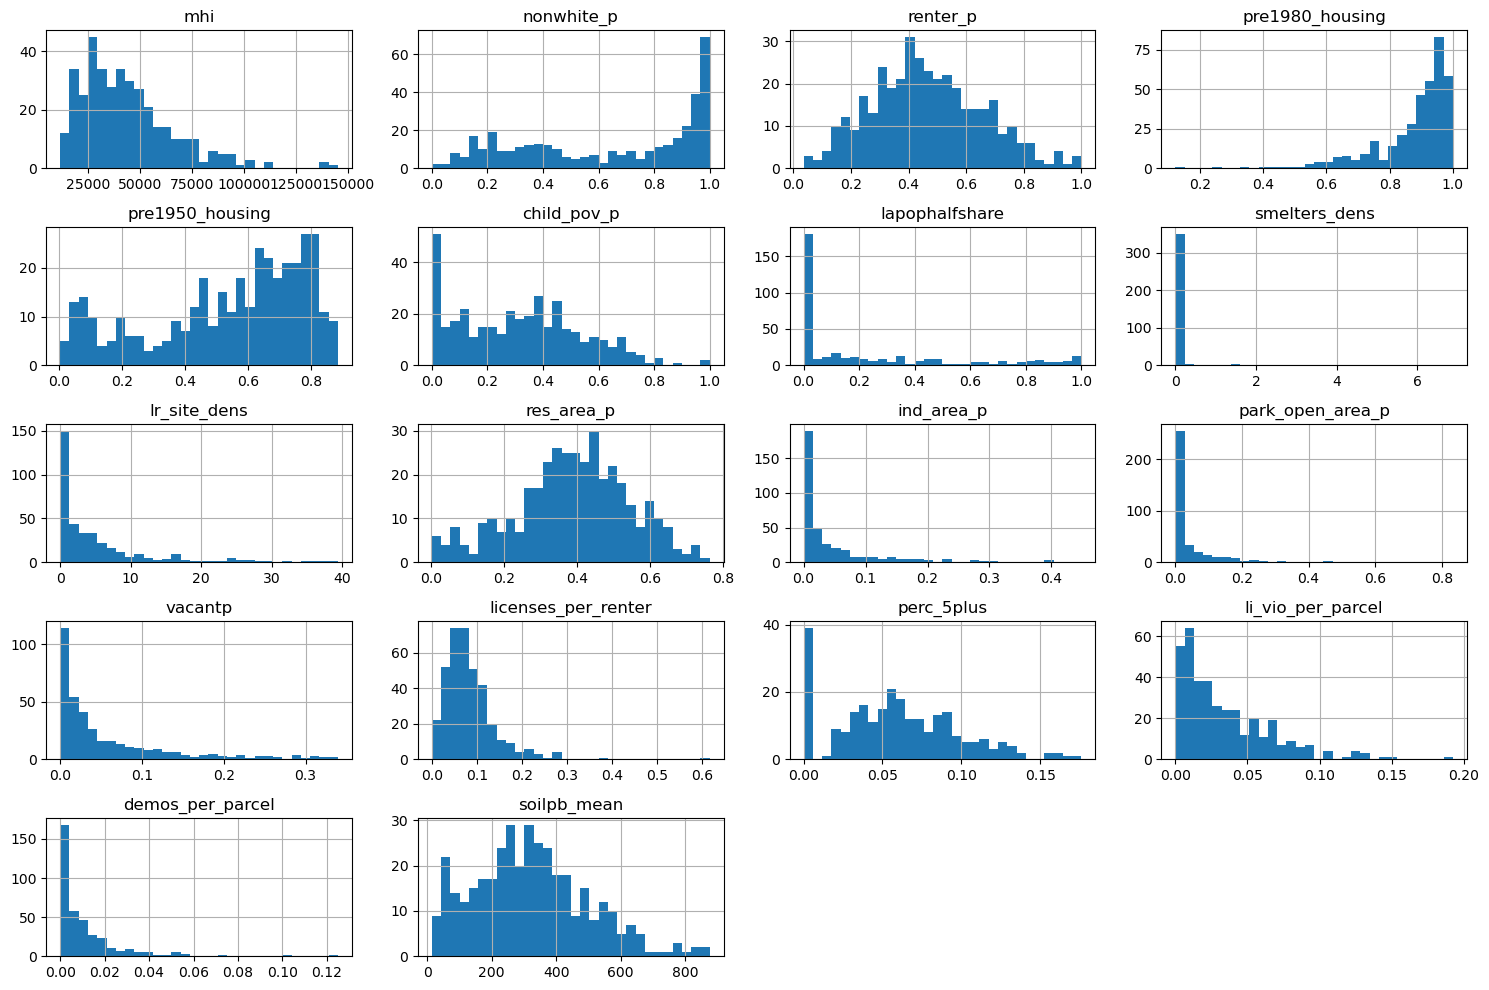

In [8]:
_ = lead_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


As we can see from the histograms above, there are a range of types of distributions, and only the histograms for renter occupied housing (renter_p), residential land use (res_area_p), and soil lead levels (soilpb_mean) are relatively close to a normal distribution.

Median household income (MHI), children under the federal poverty line (chld_pov_p), land recycling site density (lr_site_dens), industrial land use (ind_area_p), park/open space land use (park_open_area_p), vacant parcel density (vacantp), licenses per renter (licenses_per_renter), L&I violation density (li_vio_per_parcel), and demolition density (demos_per_parcel) are right skewed.

Non-white population (nonwhite_p), pre-1980 housing, and (pre1980_housing, pre-1950 housing (pre1950_housing) are left skewed.

For share of households that are >1/2 mile from a grocery store and historical smelter site density, most census tracts have a value of zero.

For percent of children with EBLL, other than the tracts that have a value of zero, the rest of census tracts seem to have close to a normal distribution with a slight right skew.

### Box plots

To get a better sense of the centrality, spread, and outliers of the data for each variable we will now use boxplots. Before we look at boxplots, we will standardize the data for each variable to have a mean of 0 and standard deviation of 1. We will make a new dataframe with these values.

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the DataFrame and transform the data
lead_df_stdz = lead_df.copy(deep=True)
lead_df_stdz[:] = scaler.fit_transform(lead_df_stdz)
    

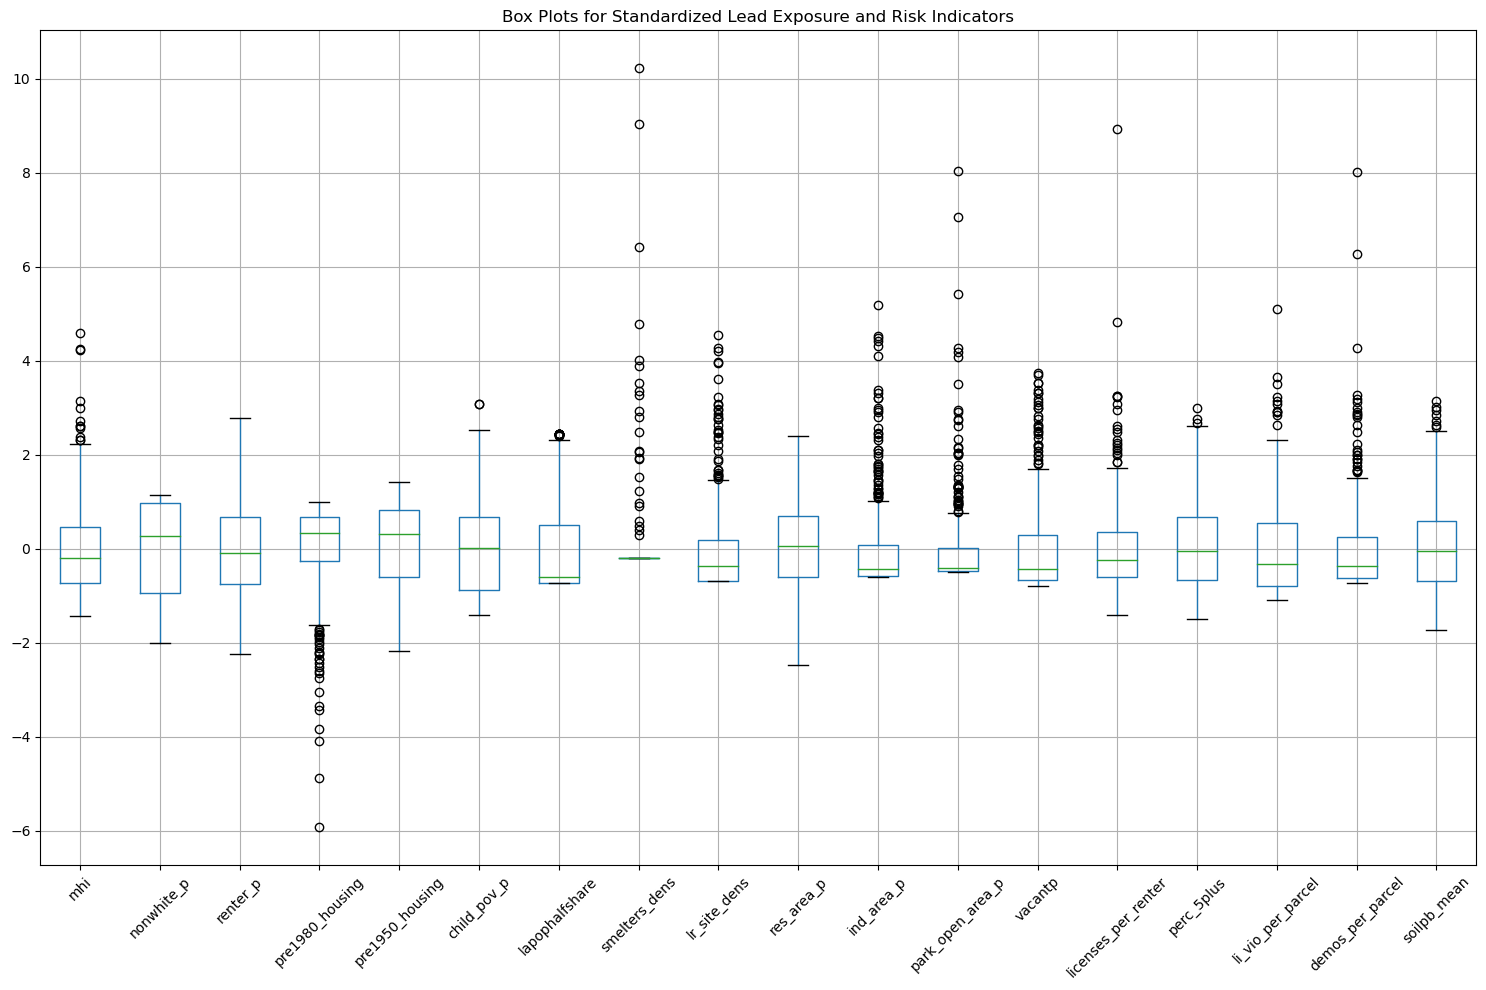

In [10]:
_ = lead_df_stdz.boxplot(figsize=(15, 10))
_ = plt.xticks(rotation = 45)
_ = plt.title("Box Plots for Standardized Lead Exposure and Risk Indicators")
plt.tight_layout()
plt.show()

Most variables have a significant number of outliers (above and below 1.5 IQR). Notably, smelter density (smelter_dens) as an IQR of 0. This is because there are only 37 historical smelter sites in Philadelphia so a vast majority of census tracts have a smelter density of zero. Therefore, any census tract with a value above zero is an outlier.

### Violin Plots

Another type of plot we can use to look at centrality and spread is violin plots. Each violin plot shows the mean and IQR like a box plot, but also shows the distribution of data.

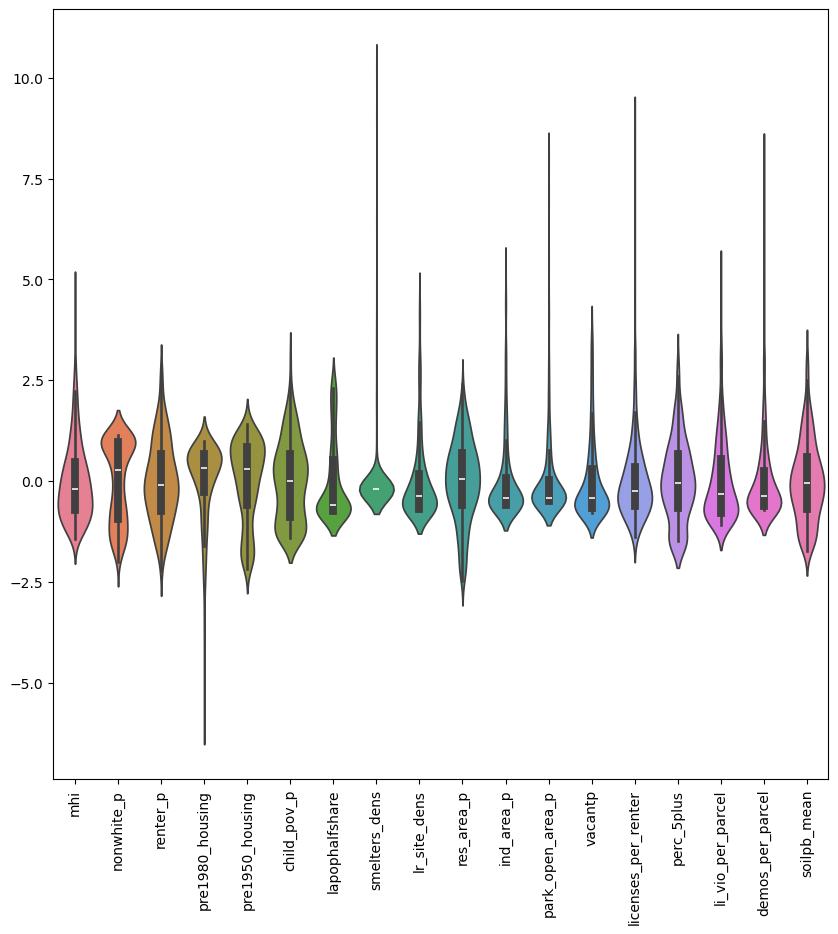

In [11]:

fig = plt.figure(figsize = (10, 10))

sns.violinplot(data=lead_df_stdz)
_ = plt.xticks(rotation='vertical')

### Correlation Matrix

Finally, we can use a correlation matrix to get a sense of how each pair of variables relates to each other. High correlations between two potential lead risk indicators (all variables other than perc_5plus and soilpb_mean), should be noted for future regression analysis. However, none of the correlations are higher than 0.8, so I won't remove variables at this point.

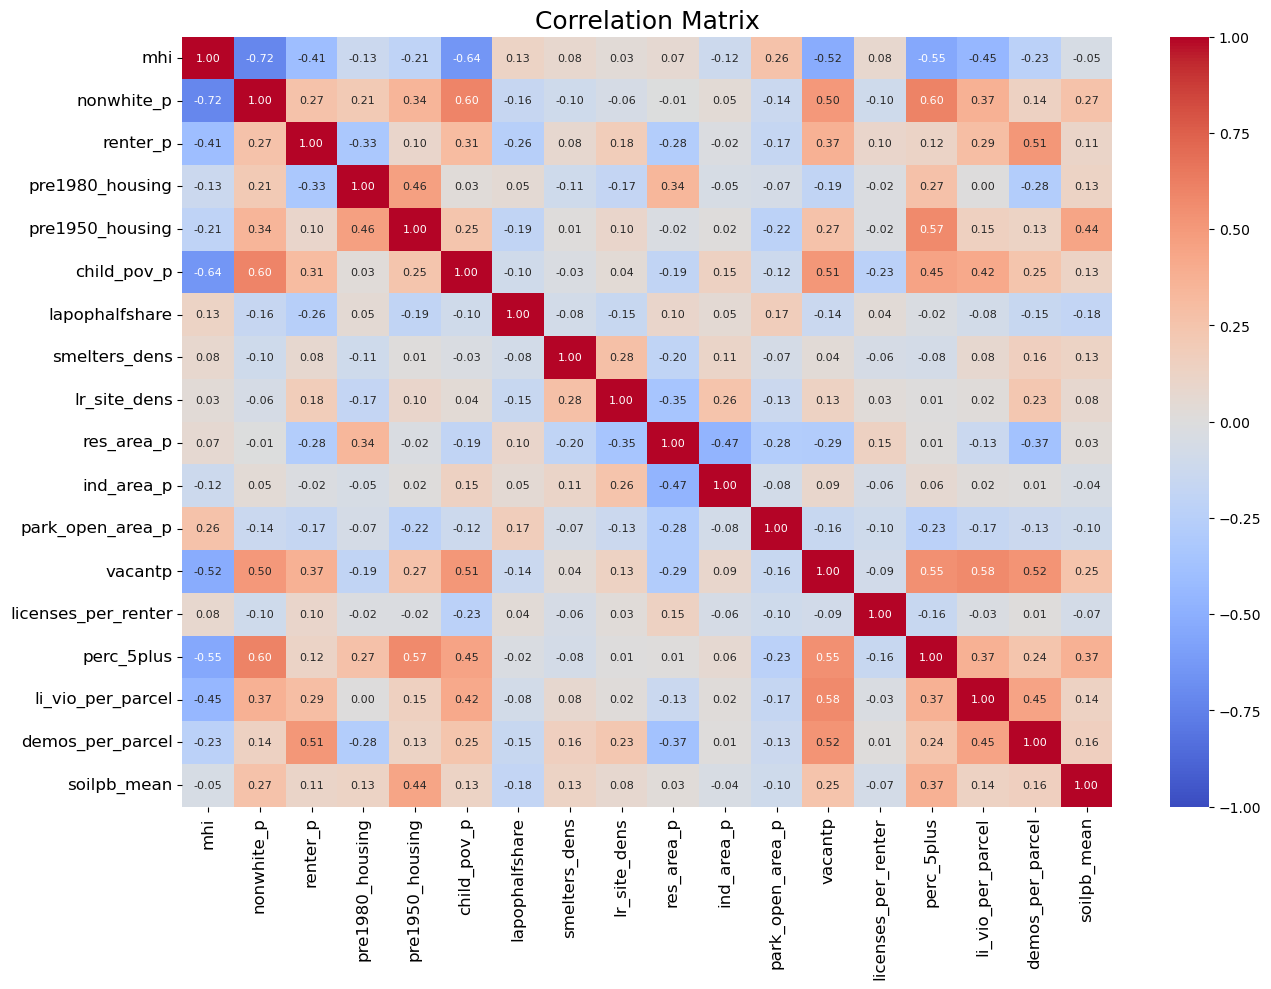

In [12]:
#check for colinearity
correlation_matrix_soil = lead_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))  # Increase the size of the figure
sns.heatmap(correlation_matrix_soil, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8}, fmt=".2f")
plt.title('Correlation Matrix', fontsize=18)  # Increase title font size
plt.xticks(fontsize=12)  # Increase x-axis font size
plt.yticks(fontsize=12)  # Increase y-axis font size
plt.show()

## Overview of Analysis

I used each form of analysis below twice - one for each dependent variable (Soil Pb Levels and Child EBLL) 

### Linear Regressions

After splitting training testing data, transforming, standardizing the independent variables, I started this analysis with a linear regression.

### Random Forest and Feature Importance

The linear regression output showed that the data may not have been normally distributed enough to do a linear model. After looking into other model options, I decided to try a Random Forest model and investigate feature importances.


## Audience and Potential Applications

### Audience 

Due to the technical nature of this analysis, the primary audience would likely be local government and institutions that may run lead risk reduction programs and campaigns. This analysis will help these groups understand the relationships between each of the independent variables and soil lead levels and child elevated blood levels. 

### Applications (Targeting outreach, designing lead risk reduction programs, resident risk awareness)

The results of this analysis can inform future legislation and lead risk reduction programs. These policies and programs should focus on interventions that address those independent variables that have the biggest impact on soil lead levels and/or child elevated blood lead levels. For example, if pre-1950s housing is found to be the most important predictor of Child EBLL, then outreach programs might focus on door to door communication with residents in homes built before 1950. Legislation might be written to require more stringent lead reporting for homes built before 1950.


## Linear and Polynomial Regression

### Transforming the Data
As shown in the histograms above, many of the variables are not normally distributed. After trying many types of transformation, I settled on the transformations below to normalize the data as much as possible. Most of the resulting variables are far from perfectly normal, but are at least an improvement. 

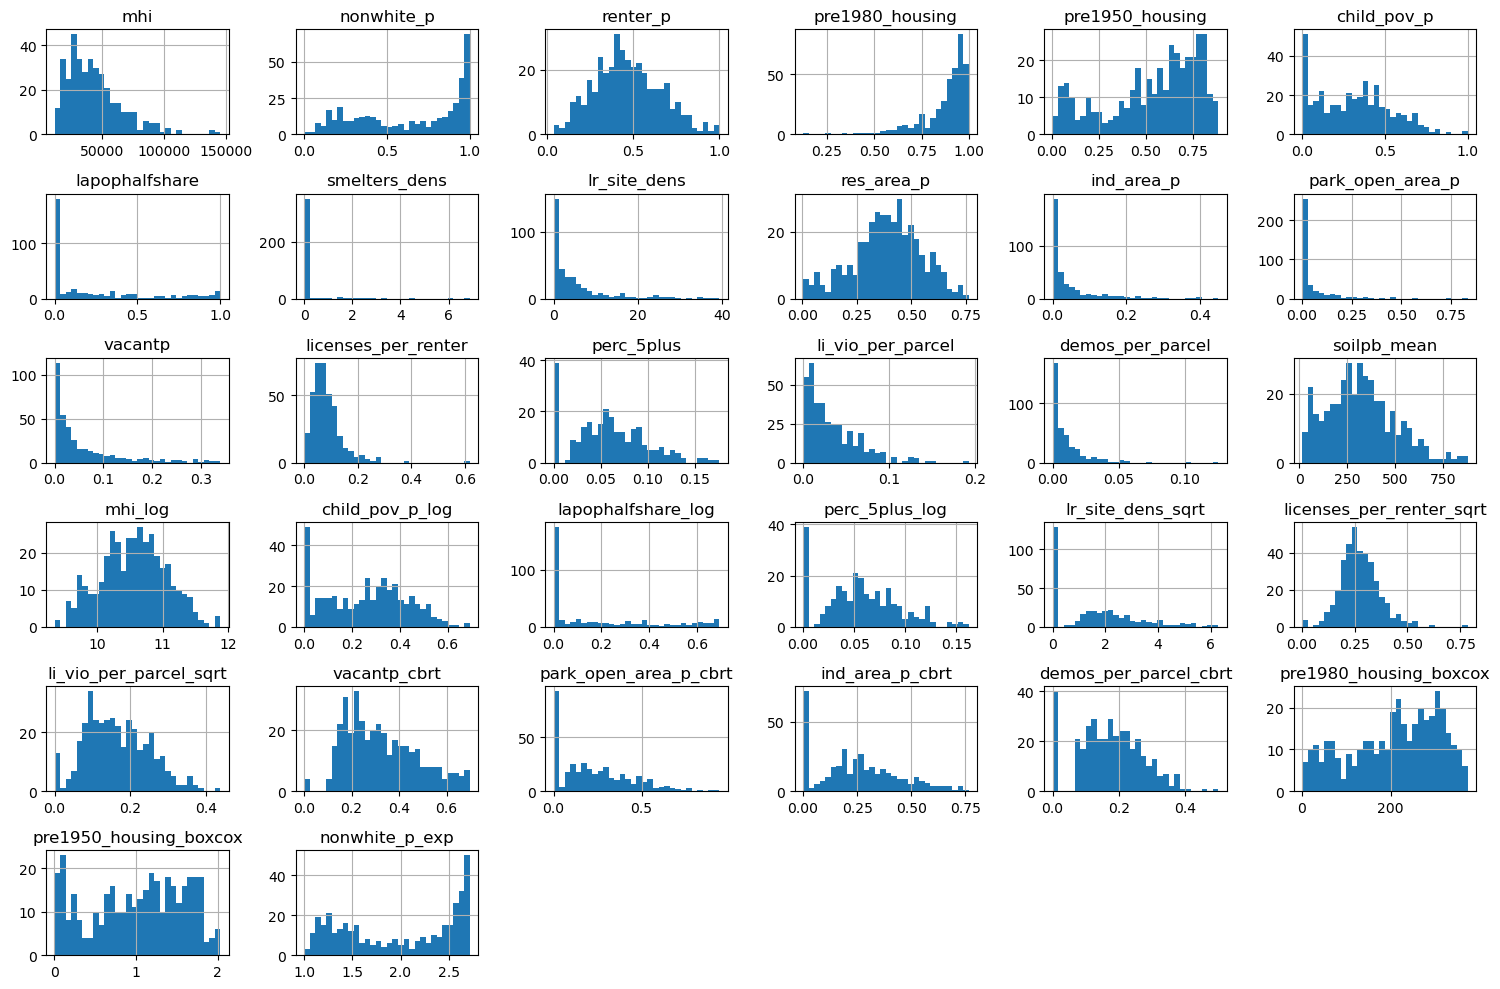

In [13]:
## #transformations
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    #log tranformations
    lead_df['mhi_log'] = np.log1p(lead_df['mhi'])  # log1p is used to handle zero values
    lead_df['child_pov_p_log'] = np.log1p(lead_df['child_pov_p'])  # log1p is used to handle zero values
    lead_df['lapophalfshare_log'] = np.log1p(lead_df['lapophalfshare'])  # log1p is used to handle zero values
    lead_df['perc_5plus_log'] = np.log1p(lead_df['perc_5plus'])  # log1p is used to handle zero values

    #sqrt transformations
    lead_df['lr_site_dens_sqrt'] = np.sqrt(lead_df['lr_site_dens'])
    lead_df.loc[:, 'licenses_per_renter_sqrt'] = np.sqrt(lead_df['licenses_per_renter'])
    lead_df.loc[:, 'li_vio_per_parcel_sqrt'] = np.sqrt(lead_df['li_vio_per_parcel'])

    #cbrt transformations
    lead_df['vacantp_cbrt'] = np.cbrt(lead_df['vacantp'])
    lead_df['park_open_area_p_cbrt'] = np.cbrt(lead_df['park_open_area_p'])
    lead_df['ind_area_p_cbrt'] = np.cbrt(lead_df['ind_area_p'])
    lead_df['demos_per_parcel_cbrt'] = np.cbrt(lead_df['demos_per_parcel'])

    #boxcox transformations
    from scipy.stats import boxcox
    lead_df['pre1980_housing_boxcox'], nonwhite_p_lambda = boxcox(lead_df['pre1980_housing'] + 1)
    lead_df['pre1950_housing_boxcox'], nonwhite_p_lambda = boxcox(lead_df['pre1950_housing'] + 1)

    #exp transformation
    lead_df['nonwhite_p_exp'] = np.exp(lead_df['nonwhite_p'])

#look at histograms with transformed values
_ = lead_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


### Separating into two dfs 

As discussed above, the Child EBLL data is redacted for many census tracts (shown in comparison of maps below). To avaoid issues with missing data, I will seperate the data into two dfs and remove null values, which will ensure the df for soil pb level analysis will still include census tracts thave redacted EBLL data

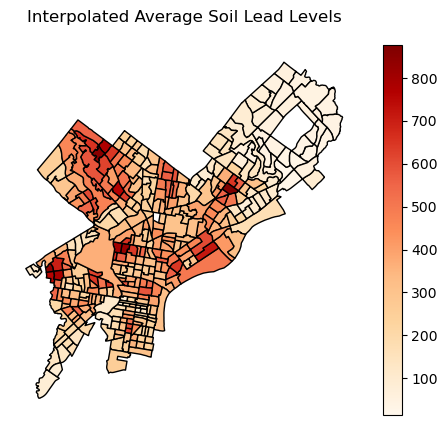

In [14]:
# map with all tracts with soil pb levels
ax = lead_gdf.plot(column='soilpb_mean', 
         cmap='OrRd',  # Choose a colormap (e.g., 'OrRd', 'Blues', 'viridis', etc.)
         legend=True,  # Show the legend
         edgecolor='black')  

# Hide the axes
ax.axis('off')

plt.title('Interpolated Average Soil Lead Levels')
plt.show()

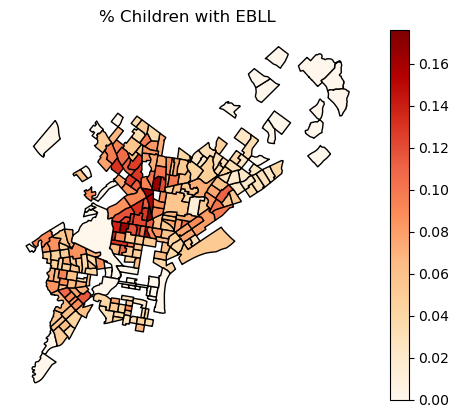

In [15]:
# Map with tracts that have ebll data 

ax = lead_gdf.plot(column='perc_5plus', 
         cmap='OrRd',  # Choose a colormap (e.g., 'OrRd', 'Blues', 'viridis', etc.)
         legend=True,  # Show the legend
         edgecolor='black')  

# Hide the axes
ax.axis('off')

plt.title('% Children with EBLL')
plt.show()

In [17]:
#make df for soil and drop tract with NA value for child_pov_p 
lead_df_soil = lead_df[['mhi','mhi_log','nonwhite_p','nonwhite_p_exp', 'renter_p', 'pre1980_housing','pre1980_housing_boxcox', 
                        'pre1950_housing','pre1950_housing_boxcox','child_pov_p','child_pov_p_log', 'lapophalfshare', 
                        'lapophalfshare_log', 'smelters_dens', 'lr_site_dens', 'lr_site_dens_sqrt','res_area_p', 'ind_area_p',
                        'ind_area_p_cbrt','park_open_area_p', 'park_open_area_p_cbrt','vacantp','vacantp_cbrt', 'licenses_per_renter',
                        'licenses_per_renter_sqrt', 'li_vio_per_parcel', 'li_vio_per_parcel_sqrt','demos_per_parcel', 
                        'demos_per_parcel_cbrt','soilpb_mean']].dropna()

#make seperate df for ebll because there are many tracts with redacted data for ebll
lead_df_ebll = lead_df.dropna()

## Linear Models

First, I'll split and standardize the transformed data


In [18]:
#split and standardize transformed data

#from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split


#predictor variables
X_ebll_t = lead_df_ebll[['mhi_log', 'nonwhite_p_exp', 'renter_p', 'pre1980_housing_boxcox', 'pre1950_housing_boxcox',
                    'child_pov_p_log', 'lapophalfshare_log', 'smelters_dens', 'lr_site_dens_sqrt', 
                    'res_area_p', 'ind_area_p_cbrt', 'park_open_area_p_cbrt', 'vacantp_cbrt', 'licenses_per_renter_sqrt',
                    'li_vio_per_parcel_sqrt','demos_per_parcel_cbrt']]

X_soil_t = lead_df_soil[['mhi_log', 'nonwhite_p_exp', 'renter_p', 'pre1980_housing_boxcox', 'pre1950_housing_boxcox',
                    'child_pov_p_log', 'lapophalfshare_log', 'smelters_dens', 'lr_site_dens_sqrt', 
                    'res_area_p', 'ind_area_p_cbrt', 'park_open_area_p_cbrt', 'vacantp_cbrt', 'licenses_per_renter_sqrt',
                    'li_vio_per_parcel_sqrt','demos_per_parcel_cbrt']]

#response variables
y_ebll_t = lead_df_ebll[['perc_5plus_log']]

y_soil = lead_df_soil[['soilpb_mean']]

#split for bll
X_train_ebll_t, X_test_ebll_t, y_train_ebll_t, y_test_ebll_t = train_test_split(X_ebll_t, y_ebll_t, test_size=0.2, random_state=42)

y_train_ebll_t = np.ravel(y_train_ebll_t)
y_test_ebll_t = np.ravel(y_test_ebll_t)


#split for soil
X_train_soil_t, X_test_soil_t, y_train_soil_t, y_test_soil_t = train_test_split(X_soil_t, y_soil, test_size=0.2, random_state=42)

y_train_soil_t = np.ravel(y_train_soil_t)
y_test_soil_t = np.ravel(y_test_soil_t)

##scale data
scaler = StandardScaler()

X_train_soil_scaled_t = scaler.fit_transform(X_train_soil_t)
X_test_soil_scaled_t = scaler.fit_transform(X_test_soil_t)
X_train_ebll_scaled_t = scaler.fit_transform(X_train_ebll_t)
X_test_ebll_scaled_t = scaler.fit_transform(X_test_ebll_t)

X_train_soil_scaled_df_t = pd.DataFrame(X_train_soil_scaled_t, columns=X_train_soil_t.columns)
X_test_soil_scaled_df_t = pd.DataFrame(X_test_soil_scaled_t, columns=X_test_soil_t.columns)
X_train_ebll_scaled_df_t = pd.DataFrame(X_train_ebll_scaled_t, columns=X_train_ebll_t.columns)
X_test_ebll_scaled_df_t = pd.DataFrame(X_test_ebll_scaled_t, columns=X_test_ebll_t.columns)


Next, used sci-kit learn to run a linear model on the soil pb levels data. I evaluate the mean squared error and the R^2 value for the training and testing data. I also show the model coefficients for each indepenedent variable. 


In [19]:
#linear model soil pb levels

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Fit the linear regression model
lm_soil = LinearRegression()
lm_soil.fit(X_train_soil_scaled_df_t, y_train_soil_t)

# Predict on training and test sets
y_train_pred_soil_t = lm_soil.predict(X_train_soil_scaled_df_t)
y_test_pred_soil_t = lm_soil.predict(X_test_soil_scaled_df_t)

# Evaluate the model
train_mse_soil_t = mean_squared_error(y_train_soil_t, y_train_pred_soil_t)
test_mse_soil_t = mean_squared_error(y_test_soil_t, y_test_pred_soil_t)
train_r2_soil_t = r2_score(y_train_soil_t, y_train_pred_soil_t)
test_r2_soil_t = r2_score(y_test_soil_t, y_test_pred_soil_t)

# Print evaluation metrics
print(f'Training MSE: {train_mse_soil_t:.4f}')
print(f'Test MSE: {test_mse_soil_t:.4f}')
print(f'Training R²: {train_r2_soil_t:.4f}')
print(f'Test R²: {test_r2_soil_t:.4f}')

# Print the coefficients
coef_df_soil = pd.DataFrame(lm_soil.coef_, X_soil_t.columns, columns=['Coefficient'])
print(coef_df_soil)

Training MSE: 22351.8250
Test MSE: 25374.2516
Training R²: 0.2913
Test R²: 0.1651
                          Coefficient
mhi_log                     55.858152
nonwhite_p_exp              39.938474
renter_p                    24.781437
pre1980_housing_boxcox       4.396272
pre1950_housing_boxcox      47.158976
child_pov_p_log            -10.832199
lapophalfshare_log         -10.503186
smelters_dens               17.425845
lr_site_dens_sqrt           -3.287882
res_area_p                  21.583761
ind_area_p_cbrt            -19.184939
park_open_area_p_cbrt       -3.683109
vacantp_cbrt                52.450768
licenses_per_renter_sqrt   -19.116085
li_vio_per_parcel_sqrt      -9.108103
demos_per_parcel_cbrt       10.827258


After running this, I got curious about the statistical significance of these coefficients. To answer this question, I use statsmodels, which can also perform a linear regression and can then output p values for each coefficient. 


In [20]:
import statsmodels.api as sm

# Add a constant (intercept) to the model
X_train_soil_with_const = sm.add_constant(X_train_soil_scaled_df_t)

# Fit the model using statsmodels
lm_soil_ols = sm.OLS(y_train_soil_t, X_train_soil_with_const).fit()

# Print the summary which includes coefficients, p-values, R², etc.
print(lm_soil_ols.summary())

# Predict on training and test sets using the statsmodels model
y_train_pred_soil_t = lm_soil_ols.predict(X_train_soil_with_const)
X_test_soil_with_const = sm.add_constant(X_test_soil_scaled_df_t)
y_test_pred_soil_t = lm_soil_ols.predict(X_test_soil_with_const)

# Evaluate the model using scikit-learn metrics
train_mse_soil_t = mean_squared_error(y_train_soil_t, y_train_pred_soil_t)
test_mse_soil_t = mean_squared_error(y_test_soil_t, y_test_pred_soil_t)
train_r2_soil_t = r2_score(y_train_soil_t, y_train_pred_soil_t)
test_r2_soil_t = r2_score(y_test_soil_t, y_test_pred_soil_t)

# Print evaluation metrics
print(f'Training MSE: {train_mse_soil_t:.4f}')
print(f'Test MSE: {test_mse_soil_t:.4f}')
print(f'Training R²: {train_r2_soil_t:.4f}')
print(f'Test R²: {test_r2_soil_t:.4f}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     7.245
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           4.43e-14
Time:                        16:32:35   Log-Likelihood:                -1921.5
No. Observations:                 299   AIC:                             3877.
Df Residuals:                     282   BIC:                             3940.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Interpretation of Ouput

**$R^2$ and MSE** This indicates that approximately 29.1% of the variance in the soil pb level variable is explained by the model. This is relatively low, suggesting that the model is not a great fit. The training R^2 is also much higher than the testing R^2, showing that the model is overfitting. This is also the case with MSE.

**Adjusted $R^2$** The adjusted R-squared is lower than R-squared, showing that including more independent variables did not improve the model much. 

**F Statistic** The F statistic and signifcance show that the model is statistically significant overall

**Omnibus, Kurtosis, JB, Skew** These all indicate that the transformed data is still not normally distributed

**Cond No. and Durbin-Watson** These show that multi-collinearity and autocorrelation are low. 

**Coefficients** mhi_log, nonwhite_p_exp, pre1950_housing_boxcox, and vacantp_cbrt have coefficients that are statistically significant. The coefficients for all other variables have a p-value > 0 .05 in this model.

* A one-unit increase in the logarithm of median household income (mhi) is associated with an increase of approximately 55.86 units in soil Pb levels.
* A one-unit increase in the exponentiated nonwhite percentage is associated with a 39.94-unit increase in soil Pb levels
* A one-unit increase in the boxcox tranformation of pre-1950 housing percent is associated with a 47.16-unit increase in soil Pb levels
* A one-unit increase in vacant parcels, after a cube root transformation, is associated with a 52.45-unit increase in soil Pb levels


I then did the same statsmodels regression with the EBLL data:

In [21]:
# Add a constant (intercept) to the model
X_train_ebll_with_const = sm.add_constant(X_train_ebll_scaled_df_t)

# Fit the model using statsmodels
lm_ebll_ols = sm.OLS(y_train_ebll_t, X_train_ebll_with_const).fit()

# Print the summary which includes coefficients, p-values, R², etc.
print(lm_ebll_ols.summary())

# Predict on training and test sets using the statsmodels model
y_train_pred_ebll_t = lm_ebll_ols.predict(X_train_ebll_with_const)
X_test_ebll_with_const = sm.add_constant(X_test_ebll_scaled_df_t)
y_test_pred_ebll_t = lm_ebll_ols.predict(X_test_ebll_with_const)

# Evaluate the model using scikit-learn metrics
train_mse_ebll_t = mean_squared_error(y_train_ebll_t, y_train_pred_ebll_t)
test_mse_ebll_t = mean_squared_error(y_test_ebll_t, y_test_pred_ebll_t)
train_r2_ebll_t = r2_score(y_train_ebll_t, y_train_pred_ebll_t)
test_r2_ebll_t = r2_score(y_test_ebll_t, y_test_pred_ebll_t)

# Print evaluation metrics
print(f'Training MSE: {train_mse_ebll_t:.4f}')
print(f'Test MSE: {test_mse_ebll_t:.4f}')
print(f'Training R²: {train_r2_ebll_t:.4f}')
print(f'Test R²: {test_r2_ebll_t:.4f}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     22.03
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.01e-34
Time:                        16:32:51   Log-Likelihood:                 483.42
No. Observations:                 203   AIC:                            -932.8
Df Residuals:                     186   BIC:                            -876.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Interpretation of Ouput

**$R^2$ and MSE** This indicates that approximately 64.6% of the variance in the soil pb level variable is explained by the model. The training R^2 is higher than the testing R^2, showing that the model is overfitting. The MSE values are close to 0 (when I ran this in my IDE, the values were 0.0005 and 0.006.

**Adjusted $R^2$** The adjusted R-squared is slightly lower than R-squared, showing that including more independent variables slightly penalized the model. 

**F Statistic** The F statistic and signifcance show that the model is statistically significant overall

**Omnibus, Kurtosis, JB, Skew** These all indicate that the transformed data is still not normally distributed

**Cond No. and Durbin-Watson** These show that multi-collinearity and autocorrelation are low. 

**Coefficients** nonwhite_p_exp, pre1950_housing_boxcox, lapophalfshare_log and vacantp_cbrt have coefficients that are statistically significant. The coefficients for all other variables have a p-value > 0 .05 in this model.

* A one-unit increase in the exponentiated nonwhite percentage is associated with a 9.846e-05-unit increase in Child EBLL
* A one-unit increase in the boxcox tranformation of pre-1950 housing percent is associated with a 9.633e-05-unit increase in Child EBLL
* A one-unit increase in the logarithm of the share population not within a half mile of a grocery store is associated with a 4.72e-05-unit increase in Child EBLL
*  A one-unit increase in vacant parcels, after a cube root transformation, is associated with a 0.0001-unit increase in Child EBLL

# Random Forest Models

Since the data are still showing signs of being not normally distributed enough for a linear model, I decided to try some other models that can handle non-normal data. I first tried a random forest model. For these, I'm going to use the non-transformed variables, so I first need to re-split the data. 

In [34]:
# Splitting data for random forest

#predictor variables
X_ebll = lead_df_ebll[['mhi', 'nonwhite_p', 'renter_p', 'pre1980_housing', 'pre1950_housing',
                    'child_pov_p', 'lapophalfshare', 'smelters_dens', 'lr_site_dens', 
                    'res_area_p', 'ind_area_p', 'park_open_area_p', 'vacantp', 'licenses_per_renter',
                    'li_vio_per_parcel','demos_per_parcel']]

X_soil = lead_df_soil[['mhi', 'nonwhite_p', 'renter_p', 'pre1980_housing', 'pre1950_housing',
                    'child_pov_p', 'lapophalfshare', 'smelters_dens', 'lr_site_dens', 
                    'res_area_p', 'ind_area_p', 'park_open_area_p', 'vacantp', 'licenses_per_renter',
                    'li_vio_per_parcel','demos_per_parcel']]

#response variables
y_ebll = lead_df_ebll[['perc_5plus']]

y_soil = lead_df_soil[['soilpb_mean']]

#split for bll
X_train_ebll, X_test_ebll, y_train_ebll, y_test_ebll = train_test_split(X_ebll, y_ebll, test_size=0.2, random_state=42)

y_train_ebll = np.ravel(y_train_ebll)
y_test_ebll = np.ravel(y_test_ebll)


#split for soil
X_train_soil, X_test_soil, y_train_soil, y_test_soil = train_test_split(X_soil, y_soil, test_size=0.2, random_state=42)

y_train_soil = y_train_soil.values.ravel()  # or y_train_soil.values.flatten()
y_test_soil = y_test_soil.values.ravel()  # or y_test_soil.values.flatten()
y_soil = y_soil.values.ravel()  # or y_soil.values.flatten()
y_ebll = y_ebll.values.ravel()  # or y_soil.values.flatten()


In order to pick the best parameters for the random forest model, I used a parameter grid search. I then print the $R^2$ and MSE for training, testing, and cross validation.

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

#hyperparameter tuning
param_grid_soil = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

rf_regressor_grid = RandomForestRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_soil = GridSearchCV(estimator=rf_regressor_grid, param_grid=param_grid_soil, cv=5, scoring='r2')
grid_search_soil.fit(X_train_soil, y_train_soil)

# Get the best model
best_rf_regressor_soil = grid_search_soil.best_estimator_

#use on train and test
y_train_pred__best_soil = best_rf_regressor_soil.predict(X_train_soil)
y_test_pred_best_soil = best_rf_regressor_soil.predict(X_test_soil)

# Evaluate the model on training
mse_soil_best_train = mean_squared_error(y_train_soil, y_train_pred_soil)
r2_soil_best_train = r2_score(y_train_soil, y_train_pred_soil)

# Evaluate the best model on the test set
mse_test_best_soil = mean_squared_error(y_test_soil, y_test_pred_best_soil)
r2_test_best_soil = r2_score(y_test_soil, y_test_pred_best_soil)

print(f'Training MSE: {mse_soil_best_train:.4f}')
print(f'Test MSE: {mse_test_best_soil:.4f}')
print(f'Training R²: {r2_soil_best_train:.4f}')
print(f'Test R²: {r2_test_best_soil:.4f}')

# Cross-validation for RandomForestRegressor
# Perform cross-validation using built-in scoring metrics
cv_r2_scores = cross_val_score(best_rf_regressor_soil, X_soil, y_soil, cv=5, scoring='r2')
cv_mse_scores = cross_val_score(best_rf_regressor_soil, X_soil, y_soil, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print(f'Cross-Validation R²: {cv_r2_scores.mean():.4f} ± {cv_r2_scores.std():.4f}')
print(f'Cross-Validation MSE: {-cv_mse_scores.mean():.4f} ± {cv_mse_scores.std():.4f}')


Training MSE: 4415.9176
Test MSE: 18225.7268
Training R²: 0.8600
Test R²: 0.4003
Cross-Validation R²: 0.3135 ± 0.0862
Cross-Validation MSE: 21193.1631 ± 4229.9273


This model initially appears to fit much better than the linear model did. The training $R^2$ is almost 3 times as high and the testing $R^2$ is twice as high. With cross-validation, however,this model explains only about 31% of the variance in the data (which is similar to the training $R^2$ from the linear model). The testing and cross-validated MSE are lower for this model. 

I then looked at the feature importances to see how different variables are contributing to the model. 

                Feature  Importance
4       pre1950_housing    0.159187
12              vacantp    0.114944
1            nonwhite_p    0.085029
15     demos_per_parcel    0.079513
9            res_area_p    0.071894
14    li_vio_per_parcel    0.068161
0                   mhi    0.062142
2              renter_p    0.057275
13  licenses_per_renter    0.050826
3       pre1980_housing    0.043143
6        lapophalfshare    0.041545
11     park_open_area_p    0.041149
10           ind_area_p    0.040465
5           child_pov_p    0.035223
8          lr_site_dens    0.035121
7         smelters_dens    0.014382


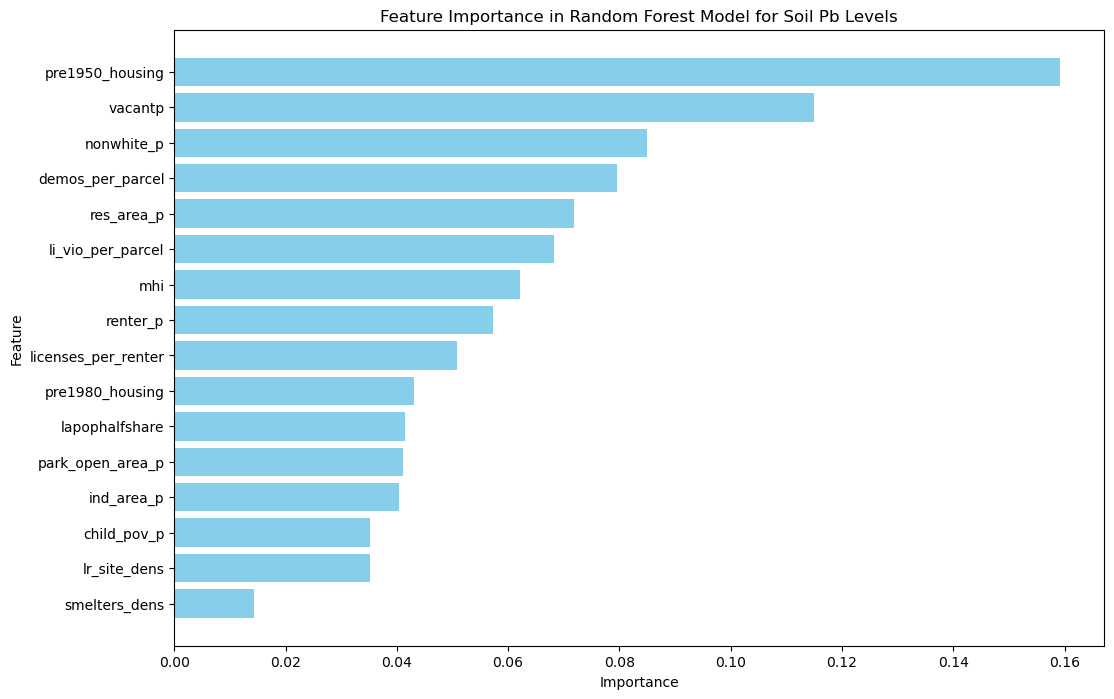

In [46]:
# Get feature importances
feature_importances = best_rf_regressor_soil.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_soil = pd.DataFrame({
    'Feature': X_train_soil.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
feature_importance_df_soil = feature_importance_df_soil.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df_soil)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df_soil['Feature'], feature_importance_df_soil['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model for Soil Pb Levels')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()


The percent of houses built before 1950 and the percent of parcels that are vacant are the two most important features by far, followed by demolitions per parcel, percent non-white population, and L&I violations per parcel. This might data might be used to direct soil lead remeditaion or outreach efforts to census tracts that have above average values for each of these indicators. It is also interesting to note that residential area is a more important feature than industrial area, which supports the idea that lead in soil comes from lead paint dust, usually used on residential structures. 

Next, I did the same grid search method for the EBLL data. 

In [47]:
#hyperparameter tuning
param_grid_ebll = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

rf_regressor_grid_ebll = RandomForestRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_ebll = GridSearchCV(estimator=rf_regressor_grid_ebll, param_grid=param_grid_ebll, cv=5, scoring='r2')
grid_search_ebll.fit(X_train_ebll, y_train_ebll)

# Get the best model and run
best_rf_regressor_ebll = grid_search_ebll.best_estimator_

#use on train and test
y_train_pred__best_soil = best_rf_regressor_ebll.predict(X_train_ebll)
y_test_pred_best_ebll = best_rf_regressor_ebll.predict(X_test_ebll)

# Evaluate the model on training
mse_ebll_best_train = mean_squared_error(y_train_ebll, y_train_pred_ebll)
r2_ebll_best_train = r2_score(y_train_ebll, y_train_pred_ebll)

# Evaluate the best model on the test set
mse_test_best_ebll = mean_squared_error(y_test_ebll, y_test_pred_best_ebll)
r2_test_best_ebll = r2_score(y_test_ebll, y_test_pred_best_ebll)

print(f'Training MSE: {mse_ebll_best_train:.4f}')
print(f'Test MSE: {mse_test_best_ebll:.4f}')
print(f'Training R²: {r2_ebll_best_train:.4f}')
print(f'Test R²: {r2_test_best_ebll:.4f}')

# Cross-validation for RandomForestRegressor
# Perform cross-validation using built-in scoring metrics
cv_r2_scores = cross_val_score(best_rf_regressor_ebll, X_ebll, y_ebll, cv=5, scoring='r2')
cv_mse_scores = cross_val_score(best_rf_regressor_ebll, X_ebll, y_ebll, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print(f'Cross-Validation R²: {cv_r2_scores.mean():.4f} ± {cv_r2_scores.std():.4f}')
print(f'Cross-Validation MSE: {-cv_mse_scores.mean():.4f} ± {cv_mse_scores.std():.4f}')


Training MSE: 0.0002
Test MSE: 0.0006
Training R²: 0.9048
Test R²: 0.4976
Cross-Validation R²: 0.5694 ± 0.0669
Cross-Validation MSE: 0.0006 ± 0.0001


The $R^2$ values are higher using random forest than a linear model for EBLL data as well. The training $R^2$ is about 0.25 higher, while the test $R^2$ is only about .1 higher. With cross-validation, the model explains about 57% of the variance in the data. 

                Feature  Importance
4       pre1950_housing    0.143969
1            nonwhite_p    0.136271
12              vacantp    0.133923
0                   mhi    0.124788
5           child_pov_p    0.074542
14    li_vio_per_parcel    0.063185
15     demos_per_parcel    0.061111
6        lapophalfshare    0.050617
3       pre1980_housing    0.046459
10           ind_area_p    0.033895
13  licenses_per_renter    0.033045
2              renter_p    0.031239
9            res_area_p    0.026665
11     park_open_area_p    0.023423
8          lr_site_dens    0.014866
7         smelters_dens    0.002001


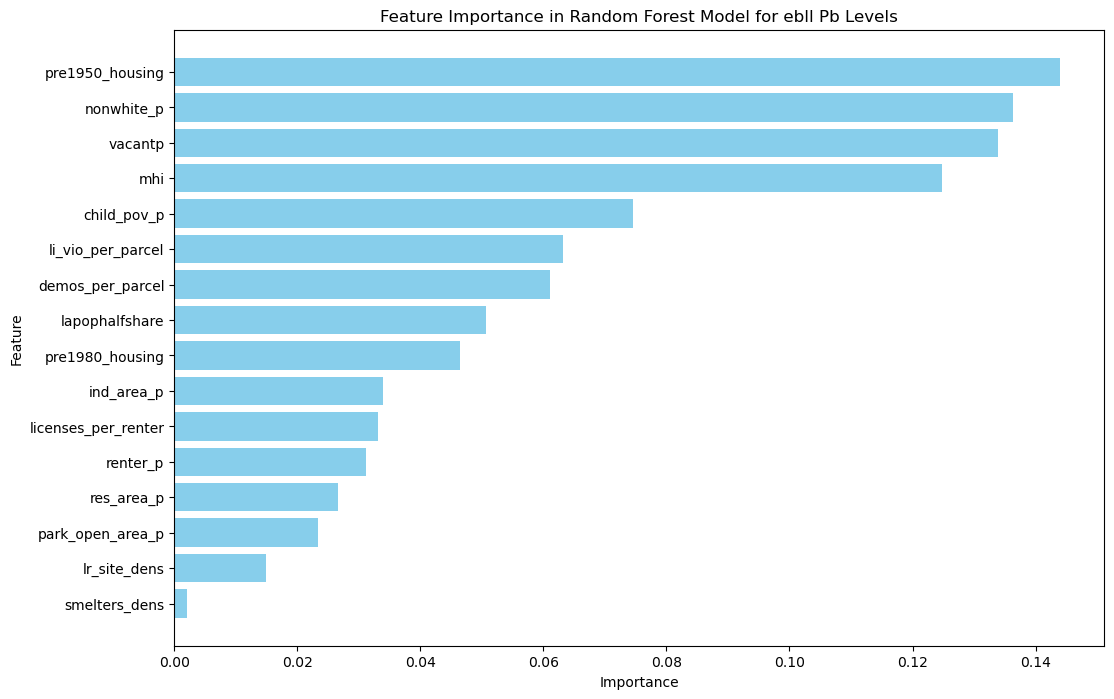

In [50]:
# Get feature importances
feature_importances_ebll = best_rf_regressor_ebll.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_ebll = pd.DataFrame({
    'Feature': X_train_ebll.columns,
    'Importance': feature_importances_ebll
})

# Sort features by importance (descending order)
feature_importance_df_ebll = feature_importance_df_ebll.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df_ebll)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df_ebll['Feature'], feature_importance_df_ebll['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model for ebll Pb Levels')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()


Percent of housing built before 1950 percent of vacant parcels, and percent non-white population are also important predictors in this model compared to the soil model. However, median household income and percent of children in poverty have much higher feature importance scores. This data indicates that programming and outreach focused on lowering child blood lead levels should also focus on cencus tracts with a high proportion of per-1950 housing, non-white poppulation, and vacant parcels, with more of a focus on tracts with lower median household income levels.

Below is a figure comparing feature importances for soil lead levels and child EBLL. 

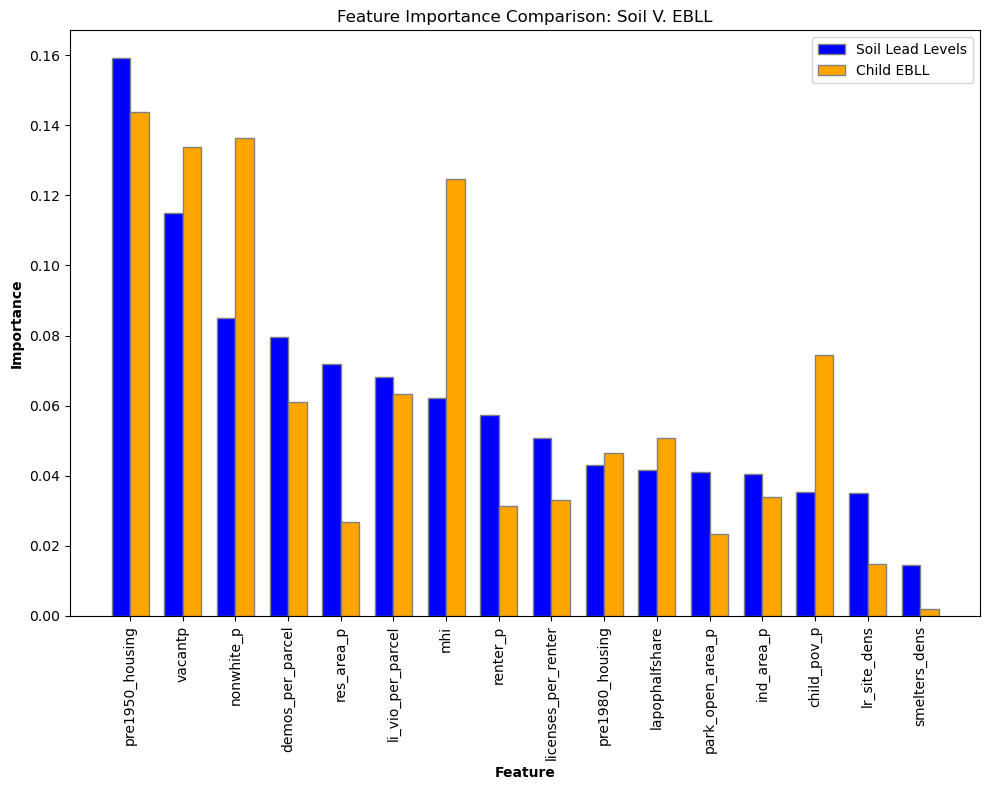

In [53]:

# Create a DataFrame to display feature importances of both models
feature_importance_comparison = pd.DataFrame({
    'Feature': X_train_ebll.columns,
    'Soil Lead Levels': feature_importances,
    'Child EBLL': feature_importances_ebll
})

# Sort features by importance (descending order)
feature_importance_comparison = feature_importance_comparison.sort_values(by='Soil Lead Levels', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 8))

# Set the position of the bars on the x-axis
bar_width = 0.35
r1 = range(len(feature_importance_comparison))
r2 = [x + bar_width for x in r1]

# Plot the bars
plt.bar(r1, feature_importance_comparison['Soil Lead Levels'], color='blue', width=bar_width, edgecolor='grey', label='Soil Lead Levels')
plt.bar(r2, feature_importance_comparison['Child EBLL'], color='orange', width=bar_width, edgecolor='grey', label='Child EBLL')

# Add labels
plt.xlabel('Feature', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(feature_importance_comparison))], feature_importance_comparison['Feature'], rotation=90)

# Add legend
plt.legend()

# Add title
plt.title('Feature Importance Comparison: Soil V. EBLL')

# Show the plot
plt.tight_layout()
plt.show()


## Overall Findings 

### Soil Lead Levels

Neither the linear model nor the random forest model did a great job at fitting the data for soil lead levels, suggesting that a more complex model may be necessary to fully understand the data or that one or more important variables is missing from the dataset. 

However, the random forest model did seem to perform slightly better. Percent of housing built before 1950 and percent of parcels that are vacant both has significant coefficients in the linear model and were among the most important features in the random forest model. Interestingly, while the transformed value for median household income has a significant coeficient in the linear model, it only had a low to moderate feature importance score. 

As stated previously, it's also notable that residential land area had a much higher feature importance score compared to industrial area, which aligns with lead in soil being related to dust from lead paint used on residential properties. In the linear model, both of these had marginal significance, with a positive association between soil lead levels and residential area and a negative association with industrial area. 

### Child EBLL

Both the linear model and the random forest model fit this data much better than the soil lead level data. However, these is still a lot of room to improve a model for this data as well either with a more complex model or more/different variables. 

As with the soil data, the random forest model performed better, particularly on the training data. Percent of housing built before 1950 percent of vacant parcels, and percent non-white population are also important predictors in this model compared to the soil model (these also had significant coefficients in the linear model). However, median household income and percent of children in poverty had much higher feature importance scores compared to the soil model. In the linear model, median household income and child poverty levels had far from significant coefficients, while share of households over 1/2 mile from a grocery store did have a significant coefficient and a low to moderate feature importance. 

### Applications

While both models can be improved, it seems clear that percent of homes built before 1950, proportions of vacant parcels, and income are likely signficant predictors of lead exposure. Therefore, outreach materials and lead risk reduction programs can focus on census tracts that meet certain criteria for these indicators. The city might also require that demolitions of homes built before 1950 have extra lead dust reduction requirements or that lead certified contractors are required for repairs and renovations in homes built before 1950. The city government could also increase funding for child blood level testing in these tracts as well as funding to make sure families in these tracts have access to resources if their child is found to have high blood lead levels. 


## Limitations*

### Soil Samples
The soil data used in this analysis is based on interpolated samples. Thus, the data are estimates. These estimates may be better in areas with more samples, since the sampling distribution is not random. 

### Redacted EBLL Data
Some of the Child EBLL data in this analysis had to be redacted due to privacy concerns. This redacted data may have an influence on the findings of this analysis as the data provided may have help provide more insight on lead levels in certain areas.

### ACS Estimates
The ACS estimates are generated at rate of 5 year. This data, while useful for predicitve analysis, must be highlighted that these are estimates and not concrete data points. The estimates can help us compare predictive analysis to see if our data matches the estiamtes made by the ACS and valuable this analysis can be for future data exploration.

## Dissemination Plan

The original dataset, this notebook (as a .ipynb file and a pdf), and the data dictionary will be available in a github repository. 
